Observation 1: Many more urban type cities were included in the dataset compared to the other two types.

Observation 2: Rural fares are substantially higher per trip obviously due to larger distances although you would expect less traffic.

Observation 3: Suburban drivers seem to be in the best situation where their fares are typially higher per rider and there are fewer drivers to compete with.

In [346]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [347]:
cities = os.path.join("Resources", "city_data.csv")
riders = os.path.join("Resources", "ride_data.csv")

city_df = pd.read_csv(cities)
ride_df = pd.read_csv(riders)



In [348]:
combo_df = pd.merge(city_df, ride_df, how='outer', on='city')
combo_df = combo_df[['city', 'date', 'fare', 'ride_id', 'driver_count', 'type']]
combo_df.head()

,city,date,fare,ride_id,driver_count,type
0,Kelseyland,2016-08-19 04:27:52,5.51,6246006544795,63,Urban
1,Kelseyland,2016-04-17 06:59:50,5.54,7466473222333,63,Urban
2,Kelseyland,2016-05-04 15:06:07,30.54,2140501382736,63,Urban
3,Kelseyland,2016-01-25 20:44:56,12.08,1896987891309,63,Urban
4,Kelseyland,2016-08-09 18:19:47,17.91,8784212854829,63,Urban


In [349]:
urban_plot = combo_df[combo_df['type']== 'Urban']
suburban_plot = combo_df[combo_df['type']== 'Suburban']
rural_plot = combo_df[combo_df['type']== 'Rural']

In [350]:
ux_axis = urban_plot["city"].value_counts()
uy_axis = urban_plot.groupby("city")['fare'].sum()/ urban_plot["city"].value_counts()
uz_axis = urban_plot.groupby("city")['driver_count'].sum()/ urban_plot["city"].value_counts() * 3 

sx_axis = suburban_plot["city"].value_counts()
sy_axis = suburban_plot.groupby("city")['fare'].sum()/ suburban_plot["city"].value_counts()
sz_axis = suburban_plot.groupby("city")['driver_count'].sum()/ suburban_plot["city"].value_counts() * 3

rx_axis = rural_plot["city"].value_counts()
ry_axis = rural_plot.groupby("city")['fare'].sum()/ rural_plot["city"].value_counts()
rz_axis = rural_plot.groupby("city")['driver_count'].sum()/ rural_plot["city"].value_counts() * 3

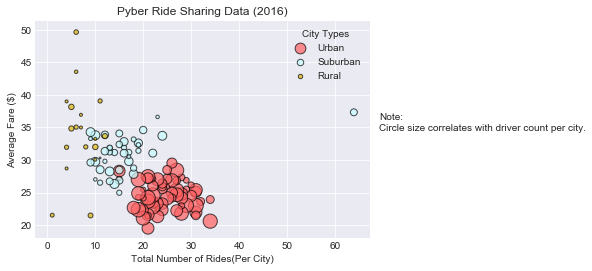

In [351]:
with plt.style.context('seaborn-dark'):
    urban_rides = plt.scatter(ux_axis, uy_axis, uz_axis, marker='o', color='#ff6163', edgecolor="black", label="Urban", alpha=0.7)
    suburban_rides = plt.scatter(sx_axis, sy_axis, sz_axis, marker='o', color='#c6fcff', edgecolor='black', label="Suburban", alpha=0.7)
    rural_rides = plt.scatter(rx_axis, ry_axis, rz_axis, marker='o', color='#dbb40c', edgecolor="black", label="Rural", alpha=0.7)
    plt.title("Pyber Ride Sharing Data (2016)")
    plt.ylabel("Average Fare ($)")
    plt.figtext(.92,.5,"Note:\nCircle size correlates with driver count per city.")
    plt.xlabel("Total Number of Rides(Per City)")
    plt.grid(True)
    plt.legend(handles=[urban_rides, suburban_rides, rural_rides], loc="best", title="City Types")
    #plt.savefig("pyber.png")
    plt.show()

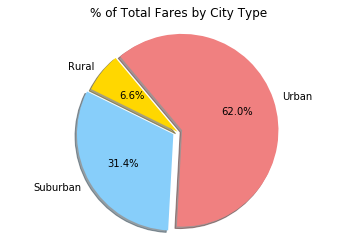

In [352]:
#Total Fares by City Type
city_types = ["Rural", "Suburban", "Urban"]
type_fares = []
colors = ('gold', 'lightskyblue', 'lightcoral')
explode = (0, 0.05, 0.05)
for x in city_types:
    response = combo_df[combo_df['type']== x]['fare'].sum()
    type_fares.append(response)
total_fares_pie = plt.pie(type_fares, autopct='%1.1f%%', shadow=True, labels=city_types, colors=colors, explode=explode, startangle=130)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

plt.show()

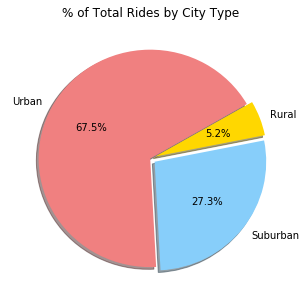

In [353]:
#Total Rides by City Type
#combo_df = combo_df.set_index('type')
#city_types = combo_df['type'].unique()
city_types = ["Urban", "Suburban", "Rural"]
colors = ('lightcoral', 'lightskyblue', 'gold')
explode = (0, 0.05, 0.05)
total_rides_pie = combo_df.type.value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', startangle=30, shadow=True, colors=colors, explode=explode, labels=city_types, title='% of Total Rides by City Type')
total_rides_pie.set_ylabel('')
plt.grid(True)
plt.show()

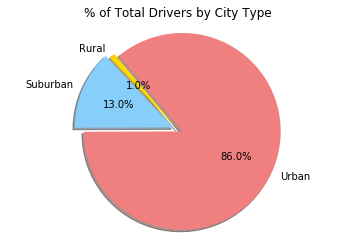

In [354]:
#Total Drivers by City Type
city_types = ["Rural", "Suburban", "Urban"]
type_fares = []
colors = ('gold', 'lightskyblue', 'lightcoral')
explode = (0, 0.05, 0.05)
for x in city_types:
    response = combo_df[combo_df['type']== x]['driver_count'].sum()
    type_fares.append(response)
total_fares_pie = plt.pie(type_fares, autopct='%1.1f%%', shadow=True, labels=city_types, colors=colors, explode=explode, startangle=130)
#total_fares_pie.set_ylabel('')
#plt.grid(True)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

plt.show()